In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

average = combined_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combined_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combined_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = combined_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combined_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stats_table = pd.DataFrame({"Average":average,"Median":median, "Variance":variance,
                            "Standard Deviation":std, "SEM":sem})
stats_table



,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

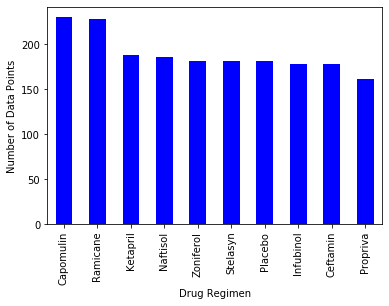

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = combined_df['Drug Regimen'].value_counts()
axis = count.plot(kind='bar', color= 'blue')
axis.set_xlabel('Drug Regimen')
axis.set_ylabel('Number of Data Points')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

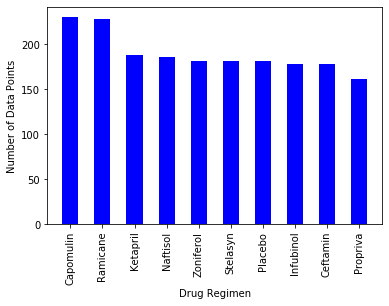

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
values = combined_df['Drug Regimen'].value_counts()
labels = values.index
plt.bar(labels, values, color = 'blue', align="center", width=.50)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)

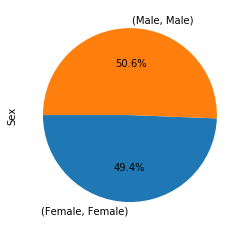

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_df.groupby('Sex')
gender_count = gender_group['Sex'].value_counts()


#Generate pie plot using pandas
chart = gender_count.plot(kind='pie', startangle=180, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x1a24c7cc90>,
 [Text(-0.020992503472586185, -1.0997996703027118, 'Female'),
  Text(0.02099250347258632, 1.0997996703027118, 'Male')],
 [Text(-0.011450456439592464, -0.5998907292560246, '49.4%'),
  Text(0.011450456439592537, 0.5998907292560246, '50.6%')])

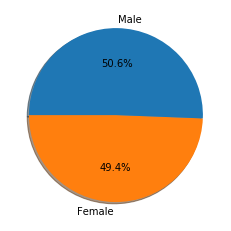

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = combined_df.groupby('Sex')
gender_count = gender_group['Sex'].value_counts()


colors = ["tab:orange", "tab:blue"]
explode = (0,0)
genders = ["Female", "Male"]

#Generate pie plot using 
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


In [34]:
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


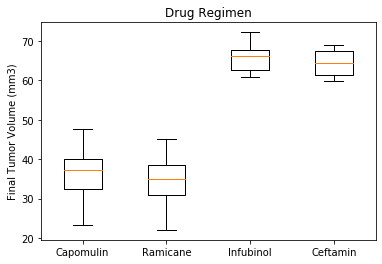

In [137]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Get the last Timepoint of tumor for Capomulin Regimen
Capomulin = combined_df["Drug Regimen"] == "Capomulin"
Cap_Max = combined_df["Timepoint"] == 45
Cap_Tv = combined_df["Tumor Volume (mm3)"][Capomulin & Cap_Max]

#Get the last Timepoint of tumor for Capomulin Regimen
Ramicane = combined_df["Drug Regimen"] == "Ramicane"
Ram_Max = combined_df["Timepoint"] == 45
Ram_Tv = combined_df["Tumor Volume (mm3)"][Ramicane & Ram_Max]

#Get the last Timepoint of tumor for Capomulin Regimen
Infubinol = combined_df["Drug Regimen"] == "Infubinol"
Inf_Max = combined_df["Timepoint"] == 45
Inf_Tv = combined_df["Tumor Volume (mm3)"][Infubinol & Inf_Max]

#Get the last Timepoint of tumor for Capomulin Regimen
Ceftamin = combined_df["Drug Regimen"] == "Ceftamin"
Cef_Max = combined_df["Timepoint"] == 45
Cef_Tv = combined_df["Tumor Volume (mm3)"][Ceftamin & Cef_Max]


#Combine all 4 regimens last Tumor Volume to be able to plot
all_regimen = [Cap_Tv, Ram_Tv, Inf_Tv, Cef_Tv]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(all_regimen, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

In [151]:
# Calculate Quartiles Lower, Upper and IQR for Capomulin
Cap_quartiles = Cap_Tv.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)

# Calculate Quartiles Lower, Upper and IQR for Ramicane
Ram_quartiles = Ram_Tv.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)

# Calculate Quartiles Lower, Upper and IQR for Infubinol
Inf_quartiles = Inf_Tv.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)

# Calculate Quartiles Lower, Upper and IQR for Ceftamin
Cef_quartiles = Cef_Tv.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)



print(f"Capomulin Values below {Cap_lower_bound} and above {Cap_upper_bound} could be outliers. IQR if {Cap_iqr}")
print(f"Ramicane Values below {Ram_lower_bound} and above {Ram_upper_bound} could be outliers. IQR if {Ram_iqr}")
print(f"Infubinol Values below {Inf_lower_bound} and above {Inf_upper_bound} could be outliers. IQR if {Inf_iqr}")
print(f"Ceftamin Values below {Cef_lower_bound} and above {Cef_upper_bound} could be outliers. IQR if {Cef_iqr}")

Capomulin Values below 20.70456164999999 and above 51.83201549 could be outliers. IQR if 7.781863460000004
Ramicane Values below 19.690480101250003 and above 49.79900043124999 could be outliers. IQR if 7.527130082499998
Infubinol Values below 55.35777559500001 and above 75.08224443499999 could be outliers. IQR if 4.9311172099999965
Ceftamin Values below 52.29350701999999 and above 76.66786758 could be outliers. IQR if 6.093590140000003
